# Reports
1. Inputs: analytics and metrics
2. Outputs: results and conclusions

# 1.0 Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import time
import warnings

# Tempo de processamento
time_agora = time.time()

###### 1.1 Loading dataset

In [2]:
# processed data
df = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\df_predict_request.pkl', 'rb'))

# columns
model_columns = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\model_columns.pkl', 'rb'))

# Feature selection
feature_selection = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\ranking_feature_selection.pkl', 'rb'))

# 2.0 Curva Lift

## 2.1 Creating Database

In [3]:
cols = 'Response probability'.split()

base = df[cols]

base = base.rename(columns={'Response': 'response'})

base.sort_values('probability', ascending=False, inplace=True)

###### 2.1 Creating X_axis

In [4]:
total_base = base.shape[0]

base['prop_base'] = 1 / total_base

base['cum_prop_base'] = np.cumsum(base['prop_base'])

cols_to_del = ['prop_base']

###### 2.2 Cummulative Interesteds

In [5]:
total_interesteds = base['response'].sum()

base['cum_response'] = np.cumsum(base['response'])

base['cum_prop_response'] = base['cum_response'] / total_interesteds

cols_to_del.append('cum_response')

###### 2.3 Baseline

In [6]:
base['baseline_model'] = 1 / total_base

base['baseline_model'] = np.cumsum(base['baseline_model'])

###### 2.4 Perfect Model

In [7]:
base.reset_index(drop=True, inplace=True)

base['perfect_model'] = 0

base.loc[range(0, total_interesteds, 1), 'perfect_model'] = 1

base['perfect_model'] = np.cumsum(base['perfect_model'])

base['perfect_model'] = base['perfect_model'] / total_interesteds

###### 2.5 Removing columns

In [8]:
cols_to_del.append('response')

base.drop(cols_to_del, axis=1, inplace=True)

## 2.5 Ploting

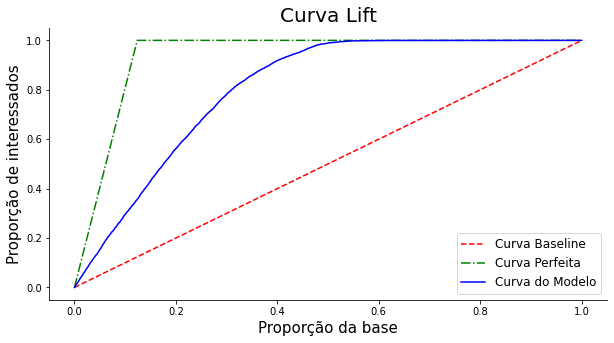

In [9]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=base, x='cum_prop_base', y='baseline_model', linestyle='--', color='r', label='Curva Baseline')
sns.lineplot(data=base, x='cum_prop_base', y='perfect_model', color='g', linestyle='-.', label='Curva Perfeita')
sns.lineplot(data=base, x='cum_prop_base', y='cum_prop_response', color='b', label='Curva do Modelo')
plt.title('Curva Lift', fontsize=20)
plt.xlabel('Proporção da base', fontsize=15)
plt.ylabel('Proporção de interessados', fontsize=15)
plt.legend(prop={'size': 12}, loc='lower right')
sns.despine();

### 4.1 Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

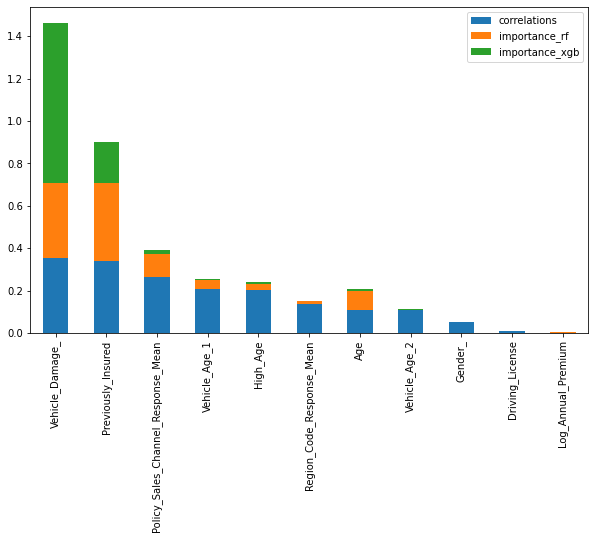

In [10]:
feature_selection[['correlations', 'importance_rf', 'importance_xgb']].sort_values('correlations', ascending=False).plot(kind='bar', figsize=(10, 6), stacked=True);

### 4.2 Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

### 4.3 E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

### 4.4 Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

# Time

In [11]:
print(f'O tempo de processamento do projeto foi de: {int(round(time.time()-time_agora, 2)/60)} minutos')

O tempo de processamento do projeto foi de: 0 minutos
